In [44]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics



data = pd.read_csv("kc_house_data.csv",sep=",")
df = pd.DataFrame(data)

drops = ['zipcode', 'id','date']
df = df.drop(drops, axis=1)
df.dropna
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [68]:
data.isnull().any()

(21613, 21)


id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

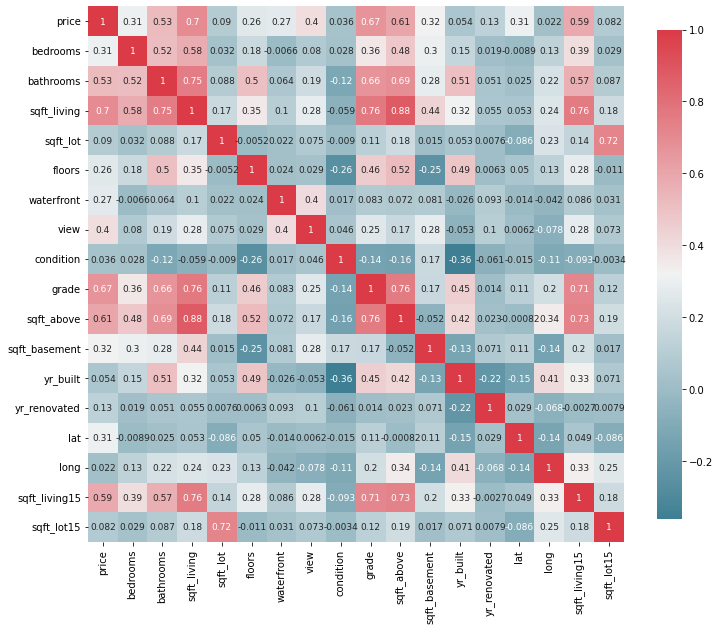

In [49]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 9 }

        )
plot_correlation_map(df)


In [90]:
x= data[["sqft_living",'grade','sqft_basement']]
y= data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)


lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))



Train accuracy 53.49 %
Test accuracy 56.08 %
MSE:  48341319666.920975
R squared:  0.6198610570195048


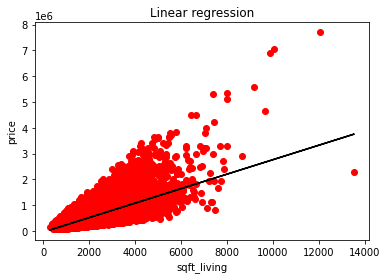

In [94]:
x= data["sqft_living"].values.reshape(-1,1)
y= data["price"].values
poly = PolynomialFeatures(degree = 1) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

In [93]:
x= data[["sqft_living",'grade','sqft_basement']]
y= data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=4)
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)



print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

Train accuracy 53.49 %
Test accuracy 56.08 %
MSE:  48467179300.37847
R squared:  0.6188713416299354


In [ ]:
# sqft_living size is the Feature  that effects the price mainly 